In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [4]:
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

In [5]:
data = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values=np.nan)

In [6]:
df = data.copy()

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
for feature in df.columns:
    print(f"{feature}: {df[feature].isnull().sum()}")

mpg: 0
cylinders: 0
displacement: 0
horsepower: 0
weight: 0
acceleration: 0
model year: 0
origin: 0
car name: 0


In [10]:
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [11]:
df2 = df[df["horsepower"] != "?"]

In [12]:
df2.horsepower = df2.horsepower.astype("float64")

<ipython-input-12-3f3bd48800fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.horsepower = df2.horsepower.astype("float64")


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [15]:
df2.drop("car name",axis=1,inplace=True)


<ipython-input-15-3589c6210bdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop("car name",axis=1,inplace=True)


In [16]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


# outlier removal

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in ['horsepower','acceleration']:
       IQR = df2[feature].quantile(0.75) -df2[feature].quantile(0.25)
       lower_bound = df2[feature].quantile(0.25) - (IQR * 1.5)
       upper_bound = df2[feature].quantile(0.75) + (IQR * 1.5)
       df2[feature] = np.where(df2[feature] > upper_bound, upper_bound, df2[feature])
       df2[feature] = np.where(df2[feature] < lower_bound, lower_bound, df2[feature])


<ipython-input-17-3cac7f697b15>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[feature] = np.where(df2[feature] > upper_bound, upper_bound, df2[feature])
<ipython-input-17-3cac7f697b15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[feature] = np.where(df2[feature] < lower_bound, lower_bound, df2[feature])
<ipython-input-17-3cac7f697b15>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

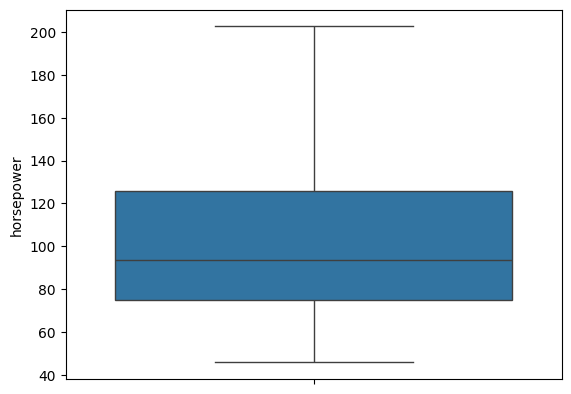

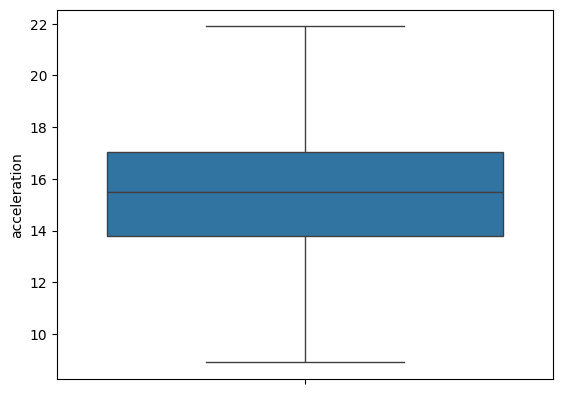

In [18]:
for feature in ['horsepower','acceleration']:
       sns.boxplot(df2[feature])
       plt.show()

#Model Building

In [19]:
x = df2.drop("mpg",axis=1)
y = df2["mpg"]

In [20]:
from sklearn.model_selection import train_test_split as split
x_train,x_test,y_train,y_test = split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import Ridge


In [35]:
ridge_reg = Ridge()

In [36]:
ridge_reg.fit(x_train,y_train)

Ridge()

In [37]:
pred = ridge_reg.predict(x_test)

In [38]:
from sklearn.metrics import mean_squared_error as mse

In [39]:
residual_error = mse(y_test,pred)

In [40]:
residual_error

10.741116425892951